# Yapay Sinir Ağları(ANN) ile Rakam Tanıma


In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils  import to_categorical,plot_model

import matplotlib.pyplot as plt
import numpy as np
import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
filterwarnings('ignore')

In [2]:
#Mnist veri setinin yüklenmesi
(x_train,y_train),(x_test,y_test) =mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print("Eğitim seti boyutu : ",x_train.shape,y_train.shape)

Eğitim seti boyutu :  (60000, 28, 28) (60000,)


In [4]:
print("Test seti boyutu : ",x_test.shape,y_test.shape)

Test seti boyutu :  (10000, 28, 28) (10000,)


In [5]:
num_labels = len(np.unique(y_train))

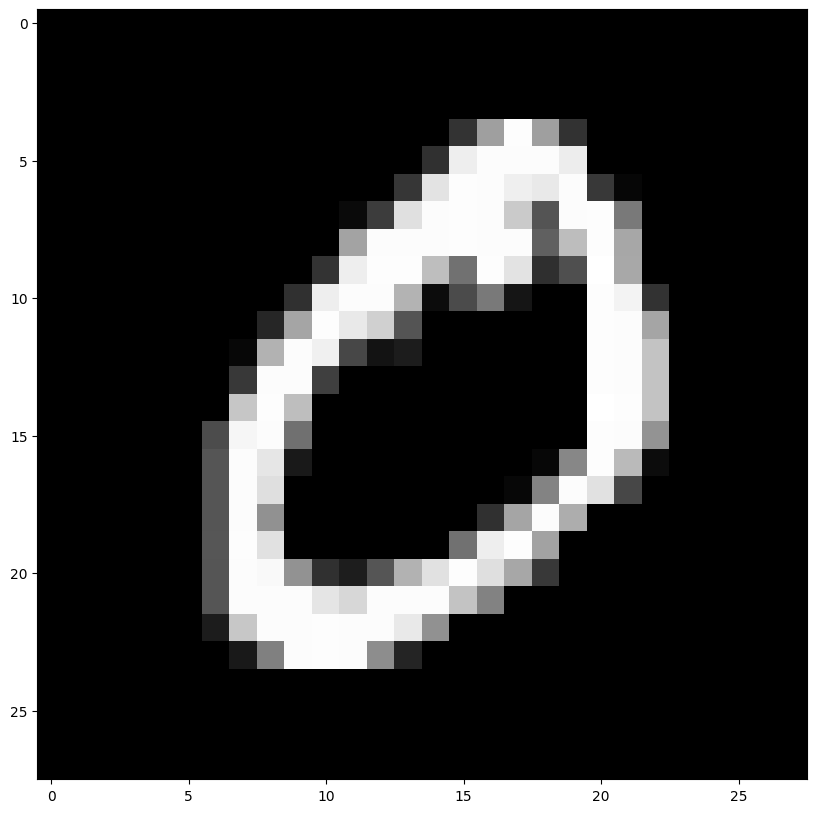

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[1],cmap="gray")

In [7]:
def visualize_img(data):
  plt.figure(figsize=(10,10))
  for i in range(10):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(data[i],cmap="gray")
    plt.axis('off')

In [ ]:
visualize_img(x_train)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[1],cmap="gray")

In [10]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):

        ax.annotate(str(round(img[x][y], 2)), xy=(y,x),
                    color='white' if img[x][y]<threshold else 'black')

In [ ]:
pixel_visualize(x_train[2])

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0:5]

In [13]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

print(f"x_train boyutu :{x_train.shape}")
print(f"x_test boyutu :{x_test.shape}")

x_train boyutu :(60000, 28, 28, 1)
x_test boyutu :(10000, 28, 28, 1)


In [ ]:
#x_train boyutu :(60000, 28, 28, 1)
#x_test boyutu :(10000, 28, 28, 1)   buradaki 1 değeri 28x28 = 784 tane verinin tutulduğu kanaldır.

In [14]:
# Standardization işlemi yapıyoruz çünkü 0-255 arası değerleri /255 yaparak 0 ile 1 arasında olacak şekilde ayarlıyoruz.Performans açısından gereklidir.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


# Sinir Ağı Mimarisini Tanımlamak

In [15]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128,activation='relu',name='layer1'),
    Dense(units=num_labels,activation='softmax',name='output_layer')])

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"]
              )

In [ ]:
model.summary()

In [20]:
model.fit(x_train,y_train,epochs=10,batch_size=128, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0239 - precision: 0.9946 - recall: 0.9930 - accuracy: 0.9938 - val_loss: 0.0793 - val_precision: 0.9795 - val_recall: 0.9754 - val_accuracy: 0.9775
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0200 - precision: 0.9955 - recall: 0.9939 - accuracy: 0.9949 - val_loss: 0.0739 - val_precision: 0.9791 - val_recall: 0.9755 - val_accuracy: 0.9766
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0168 - precision: 0.9966 - recall: 0.9958 - accuracy: 0.9963 - val_loss: 0.0782 - val_precision: 0.9778 - val_recall: 0.9745 - val_accuracy: 0.9759
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0142 - precision: 0.9975 - recall: 0.9965 - accuracy: 0.9971 - val_loss: 0.0746 - val_precision: 0.9798 - val_recall: 0.9768 - val_accuracy: 0.9781
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0124 - precision: 0.9977 - r

In [21]:
history = model.fit(x_train,y_train,epochs=10,batch_size=128, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0054 - precision: 0.9994 - recall: 0.9993 - accuracy: 0.9993 - val_loss: 0.0829 - val_precision: 0.9811 - val_recall: 0.9795 - val_accuracy: 0.9803
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0039 - precision: 0.9996 - recall: 0.9995 - accuracy: 0.9996 - val_loss: 0.0853 - val_precision: 0.9806 - val_recall: 0.9791 - val_accuracy: 0.9793
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0034 - precision: 0.9995 - recall: 0.9995 - accuracy: 0.9995 - val_loss: 0.0956 - val_precision: 0.9789 - val_recall: 0.9776 - val_accuracy: 0.9785
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0063 - precision: 0.9984 - recall: 0.9983 - accuracy: 0.9984 - val_loss: 0.0990 - val_precision: 0.9793 - val_recall: 0.9778 - val_accuracy: 0.9786
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0036 - precision: 0.9994 - r

# MODEL BAŞARISINI DEĞERLENDİRME

Text(0.5, 1.0, 'Eğitim ve Kayıp Grafiği')

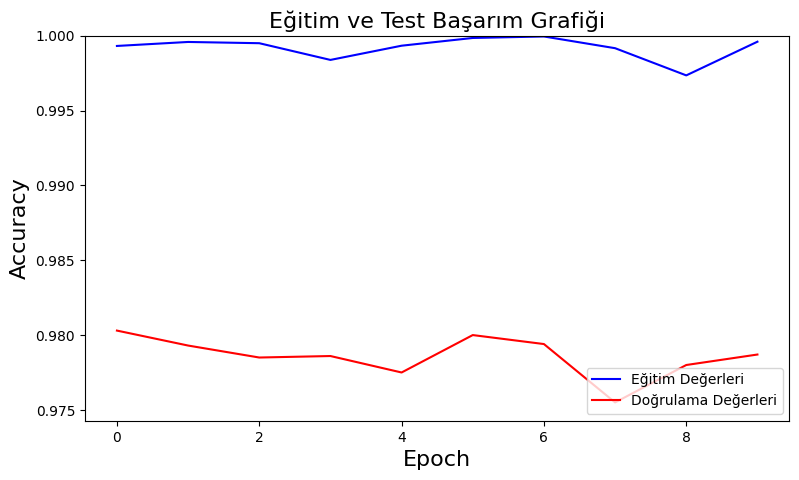

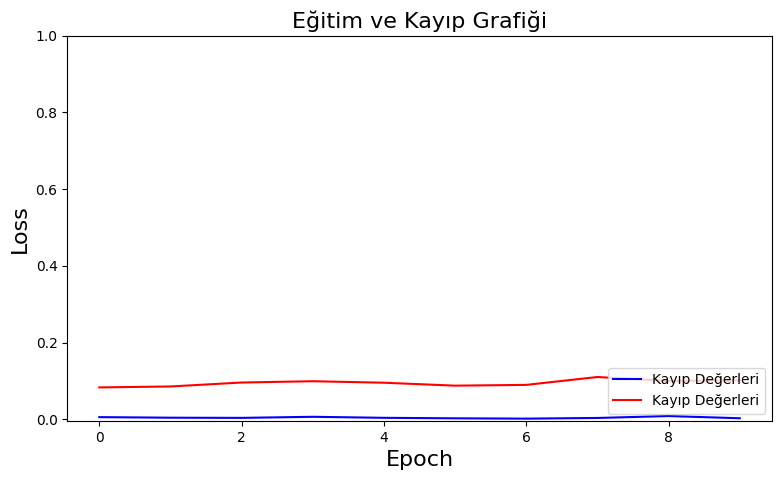

In [23]:
#----------------------------------Grafik 1 Accuracy-----------------------------------
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color='b',label='Eğitim Değerleri')
plt.plot(history.history['val_accuracy'],color='r',label='Doğrulama Değerleri')
plt.legend(loc='lower right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim ve Test Başarım Grafiği',fontsize=16)
#----------------------------------Grafik 2 Loss-----------------------------------
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],color='b',label='Kayıp Değerleri')
plt.plot(history.history['val_loss'],color='r',label='Kayıp Değerleri')
plt.legend(loc='lower right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim ve Kayıp Grafiği',fontsize=16)

In [26]:
loss,precision,recall,acc = model.evaluate(x_test,y_test,verbose=False)
print("\nTest Accuracy : %.1f%%" %(100.0 * acc))
print("\nTest Loss : %.1f%%" %(100.0 * loss))
print("\nTest Precision : %.1f%%" %(100.0 * precision))
print("\nTest Recall : %.1f%%" %(100.0 * recall))


Test Accuracy : 97.9%

Test Loss : 10.1%

Test Precision : 97.9%

Test Recall : 97.8%


# Modelin Kaydedilmesi ve Tahmin İçin Kullanılması

In [27]:
model.save("mnist_model.h5")

In [32]:
import random
random = random.randint(0,x_test.shape[0])

In [33]:
random

4810

In [34]:
test_image= x_test[random]

In [36]:
y_test[random]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

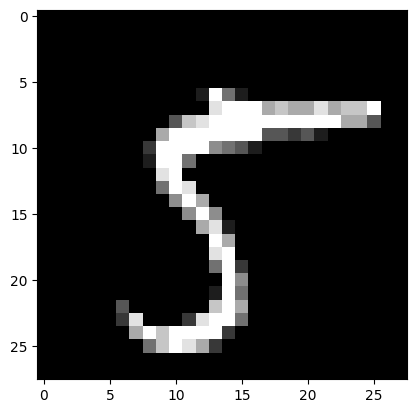

In [37]:
plt.imshow(test_image.reshape(28,28),cmap='gray')

In [39]:
test_data = x_test[random].reshape(1,28,28,1)

In [40]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 182ms/step


In [42]:
predicted_classes = np.argmax(probability)

In [43]:
predicted_classes

5

In [44]:
print(f"Tahmin Edilen Sınıf : {predicted_classes} \n")
print(f"Tahmin Edilen Sınıfıın Olasılık Değeri : {(np.argmax(probability,axis=-1))[0]} \n")
print(f"Diğer Sınıfların Olasılık Değerleri : {probability} ")

Tahmin Edilen Sınıf : 5 

Tahmin Edilen Sınıfıın Olasılık Değeri : 5 

Diğer Sınıfların Olasılık Değerleri : [[3.2039069e-16 2.5581850e-20 4.4293826e-19 1.1837056e-11 7.0973623e-25
  1.0000000e+00 3.3138334e-21 4.6633652e-12 3.7626839e-11 2.4169547e-13]] 
